# **DATA COLLECTION**

In [1]:
pwd

'/home/wsuser/work'

The dataest is collected from Kaggle which consists of both train and test images for the detection of forest fire.

***Dataset Link :*** https://www.kaggle.com/arbethi/forest-fire?select=Dataset

In [2]:
!pip install keras==2.2.4
!pip.install tensorflow==1.14.0

     |████████████████████████████████| 312 kB 19.2 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 11.5 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.2 requires keras<2.8,>=2.7.0, but you have keras 2.2.4 which is incompatible.
/usr/bin/sh: pip.install: command not found


# **IMAGE PREPROCESSING**

##Importing The ImageDataGenerator Library

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


##Define The Parameters /Arguments For ImageDataGenerator Class

In [4]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   rotation_range=180,
                                   zoom_range=0.2,
                                   horizontal_flip=True)




In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='R9ZbkaTJjEeiduj6jfAaTeIMqLWHFHbt-3iXKuzcyA69',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'imageclassification-donotdelete-pr-whoyrz3awae06o'
object_key = 'Dataset.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [9]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

##Applying ImageDataGenerator Functionality To Trainset And Testset

In [10]:
train = train_datagen.flow_from_directory('/home/wsuser/work/Dataset/Dataset/train_set',
                                          target_size=(128,128),
                                          batch_size=32,
                                          class_mode='binary')

Found 872 images belonging to 2 classes.


In [11]:
test = train_datagen.flow_from_directory('/home/wsuser/work/Dataset/Dataset/test_set',
                                          target_size=(128,128),
                                          batch_size=32,
                                          class_mode='binary')

Found 121 images belonging to 2 classes.


## **BUILD MODEL**

#Import the necessary libraries

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten

In [16]:

from tensorflow.keras.optimizers import Adam


#Initializing the model and adding CNN and Dense layers

In [17]:

model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 127008)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               32514304  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 32,515,457
Trainable params: 32,515,457
Non-trainable params: 0
_________________________________________________________________


In [18]:
#Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

##Training The Model

In [19]:
y = model.fit_generator(train,steps_per_epoch=14,epochs=15,validation_data=test,validation_steps=4)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
14/14 [==============================] - 27s 2s/step - loss: 1.4219 - accuracy: 0.6897 - val_loss: 0.2940 - val_accuracy: 0.8595
Epoch 2/15
14/14 [==============================] - 22s 2s/step - loss: 0.2904 - accuracy: 0.8774 - val_loss: 0.1256 - val_accuracy: 0.9669
Epoch 3/15
14/14 [==============================] - 23s 2s/step - loss: 0.2300 - accuracy: 0.9127 - val_loss: 0.1222 - val_accuracy: 0.9752
Epoch 4/15
14/14 [==============================] - 23s 2s/step - loss: 0.2409 - accuracy: 0.8973 - val_loss: 0.1041 - val_accuracy: 0.9669
Epoch 5/15
14/14 [==============================] - 23s 2s/step - loss: 0.2014 - accuracy: 0.9040 - val_loss: 0.0995 - val_accuracy: 0.9669
Epoch 6/15
14/14 [==============================] - 23s 2s/step - loss: 0.1724 - accuracy: 0.9269 - val_loss: 0.0922 - val_accuracy: 0.9752
Epoch 7/15
14/14 [==============================] - 23s 2s/step - loss: 0.1773 - accuracy: 0.9340 - val_loss: 0.1232 - val_accuracy: 0.9256
Epoch 8/15
14/14 [==

In [20]:
model.evaluate(test)

4/4 [==============================] - 5s 1s/step - loss: 0.0872 - accuracy: 0.9917


[0.08724307268857956, 0.9917355179786682]

##Save the Model

In [21]:
model.save('forest.h5')

In [22]:
!tar -zcvf model.tgz forest.h5

forest.h5


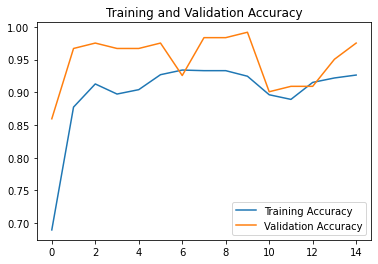

In [23]:
import matplotlib.pyplot as plt
epochs = range(0,15)
plt.plot(epochs, y.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, y.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

##Predictions

In [24]:
ls -1

Dataset/
forest.h5
model.tgz


In [25]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 10.3 MB/s eta 0:00:01


In [27]:
from ibm_watson_machine_learning import APIClient

API_KEY = "5W65wtnV1kus0WCtJ4HEMzw-lVetPUlY_B2Nje3fDq4p"

wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": 'BqoBS87WP8TkAokWualgzseaPS__YCFPAPPuwvNxDNE9'
}

client = APIClient(wml_credentials)

In [28]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [29]:
space_uid = guid_from_space_name(client, 'Forest Fire Detection')
print("Space UID: ", space_uid)

Space UID:  619f6ef2-c642-493c-b1b5-b14e7656db6f


In [30]:
client.set.default_space(space_uid)

'SUCCESS'

In [31]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [32]:
model_details = client.repository.store_model(model="model.tgz", meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
})

model_id = client.repository.get_model_id(model_details)

In [33]:
model_id

'fb303671-2f4e-47e2-8b8f-fd8384d92192'

In [34]:
client.repository.download(model_id, "model.tar.gz")

Successfully saved model content to file: 'model.tar.gz'


'/home/wsuser/work/model.tar.gz'